In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
df_features=pd.read_csv('/content/training_set_features.csv')
df_features

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg


In [3]:
df_features.columns

Index(['respondent_id', 'xyz_concern', 'xyz_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_xyz', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_xyz_vacc_effective', 'opinion_xyz_risk',
       'opinion_xyz_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')

In [4]:
df_labels=pd.read_csv('/content/training_set_labels.csv')
df_labels.head()

,respondent_id,xyz_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [5]:
# Merge the datasets on 'respondent_id'
merged_data = pd.merge(df_features,df_labels, on='respondent_id')

# Display the first few rows of the merged dataset to confirm the merge
print(merged_data.head())

   respondent_id  xyz_concern  xyz_knowledge  behavioral_antiviral_meds  \
0              0          1.0            0.0                        0.0   
1              1          3.0            2.0                        0.0   
2              2          1.0            1.0                        0.0   
3              3          1.0            1.0                        0.0   
4              4          2.0            1.0                        0.0   

   behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                   0.0                   0.0                    0.0   
1                   1.0                   0.0                    1.0   
2                   1.0                   0.0                    0.0   
3                   1.0                   0.0                    1.0   
4                   1.0                   0.0                    1.0   

   behavioral_large_gatherings  behavioral_outside_home  \
0                          0.0                      1.0  

In [6]:
merged_data.columns

Index(['respondent_id', 'xyz_concern', 'xyz_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_xyz', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_xyz_vacc_effective', 'opinion_xyz_risk',
       'opinion_xyz_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation', 'xyz_vaccine', 'seasonal_vaccine'],
      dtype='object')

In [7]:
merged_data.describe()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,opinion_xyz_vacc_effective,opinion_xyz_risk,opinion_xyz_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,xyz_vaccine,seasonal_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454,0.465608
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052,0.498825
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000,1.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000,1.000000


In [8]:
n=merged_data.isnull().sum()
print(n)

respondent_id                      0
xyz_concern                       92
xyz_knowledge                    116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_xyz                 2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_xyz_vacc_effective       391
opinion_xyz_risk                 388
opinion_xyz_sick_from_vacc       395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

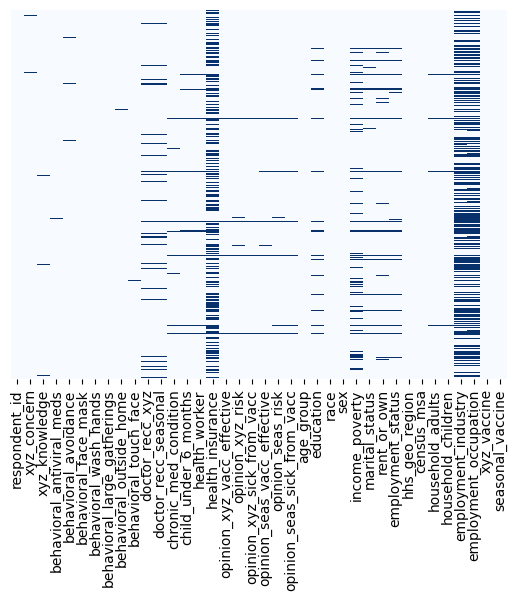

In [9]:
sns.heatmap(merged_data.isnull(), cmap='Blues', cbar=False, yticklabels=False, xticklabels=merged_data.columns);

In [10]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Assuming merged_data is your DataFrame
# merged_data = pd.read_csv('path_to_merged_data.csv')  # Uncomment and modify the path as needed

# Columns to replace null values with mode
mode_columns = [
    'xyz_concern', 'xyz_knowledge', 'behavioral_antiviral_meds', 'behavioral_avoidance',
    'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_large_gatherings',
    'behavioral_outside_home', 'behavioral_touch_face', 'doctor_recc_xyz', 'doctor_recc_seasonal',
    'chronic_med_condition', 'child_under_6_months', 'health_worker','opinion_xyz_vacc_effective',
    'opinion_xyz_risk', 'opinion_xyz_sick_from_vacc',  'household_adults', 'household_children',
    'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc',
]

# Define the SimpleImputer with the strategy as 'most_frequent' for mode
mode_imputer = SimpleImputer(strategy='most_frequent')

# Apply the imputer to the mode columns
merged_data[mode_columns] = mode_imputer.fit_transform(merged_data[mode_columns])


categorical_columns = [
    'age_group', 'education', 'race', 'sex', 'income_poverty', 'marital_status', 'rent_or_own',
    'employment_status', 'hhs_geo_region', 'census_msa', 'employment_industry', 'employment_occupation'
]


# Define imputers for the remaining columns

categorical_imputer = SimpleImputer(strategy='constant', fill_value='Unknown')


# Apply the imputers
#merged_data[binary_columns] = binary_imputer.fit_transform(merged_data[binary_columns])
merged_data[categorical_columns] = categorical_imputer.fit_transform(merged_data[categorical_columns])
#merged_data[numerical_columns] = numerical_imputer.fit_transform(merged_data[numerical_columns])

# Check the result
print(merged_data.isnull().sum())

# Optionally, save the cleaned data to a new CSV file
# merged_data.to_csv('cleaned_data.csv', index=False)


respondent_id                      0
xyz_concern                        0
xyz_knowledge                      0
behavioral_antiviral_meds          0
behavioral_avoidance               0
behavioral_face_mask               0
behavioral_wash_hands              0
behavioral_large_gatherings        0
behavioral_outside_home            0
behavioral_touch_face              0
doctor_recc_xyz                    0
doctor_recc_seasonal               0
chronic_med_condition              0
child_under_6_months               0
health_worker                      0
health_insurance               12274
opinion_xyz_vacc_effective         0
opinion_xyz_risk                   0
opinion_xyz_sick_from_vacc         0
opinion_seas_vacc_effective        0
opinion_seas_risk                  0
opinion_seas_sick_from_vacc        0
age_group                          0
education                          0
race                               0
sex                                0
income_poverty                     0
m

In [13]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Assuming merged_data is your DataFrame
# merged_data = pd.read_csv('path_to_merged_data.csv')  # Uncomment and modify the path as needed

# Columns to replace null values with mode
mode_columns = [
    'xyz_concern', 'xyz_knowledge', 'behavioral_antiviral_meds', 'behavioral_avoidance',
    'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_large_gatherings',
    'behavioral_outside_home', 'behavioral_touch_face', 'doctor_recc_xyz', 'doctor_recc_seasonal',
    'chronic_med_condition', 'child_under_6_months', 'health_worker','opinion_xyz_vacc_effective',
    'opinion_xyz_risk', 'opinion_xyz_sick_from_vacc',  'household_adults', 'household_children',
    'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc',
]

# Define the SimpleImputer with the strategy as 'most_frequent' for mode
mode_imputer = SimpleImputer(strategy='most_frequent')

# Apply the imputer to the mode columns
test_df[mode_columns] = mode_imputer.fit_transform(test_df[mode_columns])


categorical_columns = [
    'age_group', 'education', 'race', 'sex', 'income_poverty', 'marital_status', 'rent_or_own',
    'employment_status', 'hhs_geo_region', 'census_msa', 'employment_industry', 'employment_occupation'
]


# Define imputers for the remaining columns

categorical_imputer = SimpleImputer(strategy='constant', fill_value='Unknown')


# Apply the imputers
#merged_data[binary_columns] = binary_imputer.fit_transform(merged_data[binary_columns])
test_df[categorical_columns] = categorical_imputer.fit_transform(test_df[categorical_columns])
#merged_data[numerical_columns] = numerical_imputer.fit_transform(merged_data[numerical_columns])

# Check the result
print(test_df.isnull().sum())

# Optionally, save the cleaned data to a new CSV file
# merged_data.to_csv('cleaned_data.csv', index=False)


respondent_id                      0
xyz_concern                        0
xyz_knowledge                      0
behavioral_antiviral_meds          0
behavioral_avoidance               0
behavioral_face_mask               0
behavioral_wash_hands              0
behavioral_large_gatherings        0
behavioral_outside_home            0
behavioral_touch_face              0
doctor_recc_xyz                    0
doctor_recc_seasonal               0
chronic_med_condition              0
child_under_6_months               0
health_worker                      0
health_insurance               12228
opinion_xyz_vacc_effective         0
opinion_xyz_risk                   0
opinion_xyz_sick_from_vacc         0
opinion_seas_vacc_effective        0
opinion_seas_risk                  0
opinion_seas_sick_from_vacc        0
age_group                          0
education                          0
race                               0
sex                                0
income_poverty                     0
m

In [14]:
test_df['health_insurance'].fillna(2.0, inplace = True)

In [15]:
merged_data['health_insurance'].fillna(2.0, inplace = True)

In [16]:
print(merged_data.isnull().sum())

respondent_id                  0
xyz_concern                    0
xyz_knowledge                  0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_xyz                0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_xyz_vacc_effective     0
opinion_xyz_risk               0
opinion_xyz_sick_from_vacc     0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_re

In [17]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Assuming merged_data is your DataFrame
# merged_data = pd.read_csv('path_to_merged_data.csv')  # Uncomment and modify the path as needed

# List of categorical columns to be one-hot encoded
categorical_columns = [
    'age_group', 'education', 'race', 'sex', 'income_poverty', 'marital_status', 'rent_or_own',
    'employment_status', 'hhs_geo_region', 'census_msa','employment_industry',
'employment_occupation'
]

# One-hot encoder for categorical columns
onehot_encoder = OneHotEncoder(drop='first', handle_unknown='ignore')

# Apply one-hot encoding to the categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', onehot_encoder, categorical_columns)
    ],
    remainder='passthrough'  # Keeps the rest of the columns untouched
)

# Fit and transform the data
encoded_data = preprocessor.fit_transform(merged_data)

# Convert the encoded data back to a DataFrame
encoded_columns = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_columns)
all_columns = encoded_columns.tolist() + [col for col in merged_data.columns if col not in categorical_columns]

df = pd.DataFrame(encoded_data, columns=all_columns)

# Display the first few rows of the encoded DataFrame
print(df.head())

# Optionally, save the encoded data to a new CSV file
# encoded_df.to_csv('encoded_data.csv', index=False)


   age_group_35 - 44 Years  age_group_45 - 54 Years  age_group_55 - 64 Years  \
0                      0.0                      0.0                      1.0   
1                      1.0                      0.0                      0.0   
2                      0.0                      0.0                      0.0   
3                      0.0                      0.0                      0.0   
4                      0.0                      1.0                      0.0   

   age_group_65+ Years  education_< 12 Years  education_College Graduate  \
0                  0.0                   1.0                         0.0   
1                  0.0                   0.0                         0.0   
2                  0.0                   0.0                         1.0   
3                  1.0                   0.0                         0.0   
4                  0.0                   0.0                         0.0   

   education_Some College  education_Unknown  race_Hispanic  \

In [18]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Assuming merged_data is your DataFrame
# merged_data = pd.read_csv('path_to_merged_data.csv')  # Uncomment and modify the path as needed

# List of categorical columns to be one-hot encoded
categorical_columns = [
    'age_group', 'education', 'race', 'sex', 'income_poverty', 'marital_status', 'rent_or_own',
    'employment_status', 'hhs_geo_region', 'census_msa','employment_industry',
'employment_occupation'
]

# One-hot encoder for categorical columns
onehot_encoder = OneHotEncoder(drop='first', handle_unknown='ignore')

# Apply one-hot encoding to the categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', onehot_encoder, categorical_columns)
    ],
    remainder='passthrough'  # Keeps the rest of the columns untouched
)

# Fit and transform the data
encoded_data = preprocessor.fit_transform(test_df)

# Convert the encoded data back to a DataFrame
encoded_columns = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_columns)
all_columns = encoded_columns.tolist() + [col for col in test_df.columns if col not in categorical_columns]

testdf = pd.DataFrame(encoded_data, columns=all_columns)

# Display the first few rows of the encoded DataFrame
print(testdf.head())

# Optionally, save the encoded data to a new CSV file
# encoded_df.to_csv('encoded_data.csv', index=False)

   age_group_35 - 44 Years  age_group_45 - 54 Years  age_group_55 - 64 Years  \
0                      1.0                      0.0                      0.0   
1                      0.0                      0.0                      0.0   
2                      0.0                      0.0                      1.0   
3                      0.0                      0.0                      0.0   
4                      1.0                      0.0                      0.0   

   age_group_65+ Years  education_< 12 Years  education_College Graduate  \
0                  0.0                   0.0                         1.0   
1                  0.0                   0.0                         0.0   
2                  0.0                   0.0                         1.0   
3                  1.0                   0.0                         0.0   
4                  0.0                   0.0                         0.0   

   education_Some College  education_Unknown  race_Hispanic  \

In [60]:
import pandas as pd

# Assuming merged_data is your DataFrame
# merged_data = pd.read_csv('path_to_preprocessed_data.csv')  # Uncomment and modify the path as needed

# List of columns for which you want to print unique values
columns_to_check = ['age_group', 'education', 'race', 'sex', 'income_poverty', 'marital_status', 'rent_or_own',
    'employment_status', 'hhs_geo_region', 'census_msa','health_insurance'
]



# Print unique values of each column
for col in columns_to_check:
    unique_values = merged_data[col].unique()
    print(f"Unique values of '{col}':")
    print(unique_values)
    print()  # Print an empty line for better readability


Unique values of 'age_group':
['55 - 64 Years' '35 - 44 Years' '18 - 34 Years' '65+ Years'
 '45 - 54 Years']

Unique values of 'education':
['< 12 Years' '12 Years' 'College Graduate' 'Some College' 'Unknown']

Unique values of 'race':
['White' 'Black' 'Other or Multiple' 'Hispanic']

Unique values of 'sex':
['Female' 'Male']

Unique values of 'income_poverty':
['Below Poverty' '<= $75,000, Above Poverty' '> $75,000' 'Unknown']

Unique values of 'marital_status':
['Not Married' 'Married' 'Unknown']

Unique values of 'rent_or_own':
['Own' 'Rent' 'Unknown']

Unique values of 'employment_status':
['Not in Labor Force' 'Employed' 'Unemployed' 'Unknown']

Unique values of 'hhs_geo_region':
['oxchjgsf' 'bhuqouqj' 'qufhixun' 'lrircsnp' 'atmpeygn' 'lzgpxyit'
 'fpwskwrf' 'mlyzmhmf' 'dqpwygqj' 'kbazzjca']

Unique values of 'census_msa':
['Non-MSA' 'MSA, Not Principle  City' 'MSA, Principle City']

Unique values of 'health_insurance':
[1. 2. 0.]



In [19]:
df.set_index('respondent_id', inplace=True)

# Print the first few rows to verify
print(df.head())

               age_group_35 - 44 Years  age_group_45 - 54 Years  \
respondent_id                                                     
0.0                                0.0                      0.0   
1.0                                1.0                      0.0   
2.0                                0.0                      0.0   
3.0                                0.0                      0.0   
4.0                                0.0                      1.0   

               age_group_55 - 64 Years  age_group_65+ Years  \
respondent_id                                                 
0.0                                1.0                  0.0   
1.0                                0.0                  0.0   
2.0                                0.0                  0.0   
3.0                                0.0                  1.0   
4.0                                0.0                  0.0   

               education_< 12 Years  education_College Graduate  \
respondent_id        

In [22]:
testdf.set_index('respondent_id', inplace=True)

# Print the first few rows to verify
print(testdf.head())

               age_group_35 - 44 Years  age_group_45 - 54 Years  \
respondent_id                                                     
26707.0                            1.0                      0.0   
26708.0                            0.0                      0.0   
26709.0                            0.0                      0.0   
26710.0                            0.0                      0.0   
26711.0                            1.0                      0.0   

               age_group_55 - 64 Years  age_group_65+ Years  \
respondent_id                                                 
26707.0                            0.0                  0.0   
26708.0                            0.0                  0.0   
26709.0                            1.0                  0.0   
26710.0                            0.0                  1.0   
26711.0                            0.0                  0.0   

               education_< 12 Years  education_College Graduate  \
respondent_id        

In [20]:
df

,age_group_35 - 44 Years,age_group_45 - 54 Years,age_group_55 - 64 Years,age_group_65+ Years,education_< 12 Years,education_College Graduate,education_Some College,education_Unknown,race_Hispanic,race_Other or Multiple,...,opinion_xyz_vacc_effective,opinion_xyz_risk,opinion_xyz_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,xyz_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,
0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3.0,1.0,2.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0
1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,4.0,4.0,4.0,2.0,4.0,0.0,0.0,0.0,1.0
2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,3.0,1.0,1.0,4.0,1.0,2.0,2.0,0.0,0.0,0.0
3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,3.0,5.0,5.0,4.0,1.0,0.0,0.0,0.0,1.0
4.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,3.0,3.0,2.0,3.0,1.0,4.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,3.0,1.0,1.0,5.0,2.0,2.0,0.0,0.0,0.0,0.0
26703.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,4.0,2.0,2.0,5.0,1.0,1.0,1.0,0.0,0.0,0.0
26704.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,4.0,4.0,2.0,5.0,4.0,2.0,0.0,0.0,0.0,1.0


In [21]:
import pandas as pd
import numpy as np

# Assuming merged_data is your DataFrame
# merged_data = pd.read_csv('path_to_merged_data.csv')  # Uncomment and modify the path as needed

# Numerical columns for outlier detection
numerical_columns = [
 'xyz_concern', 'xyz_knowledge', 'behavioral_antiviral_meds', 'behavioral_avoidance',
    'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_large_gatherings',
    'behavioral_outside_home', 'behavioral_touch_face', 'doctor_recc_xyz', 'doctor_recc_seasonal',
    'chronic_med_condition', 'child_under_6_months', 'health_worker','opinion_xyz_vacc_effective',
    'opinion_xyz_risk', 'opinion_xyz_sick_from_vacc',  'household_adults', 'household_children',
    'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc','health_insurance',]

# Function to detect outliers using IQR
def detect_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers.shape[0]

# Detect and print outliers for each numerical column
outliers_dict = {}
outliers_count = {}
for col in numerical_columns:
    outliers = detect_outliers(testdf, col)
    outliers_dict[col] = outliers
    outliers_count[col] = detect_outliers(testdf, col)
    print(f'Number of outliers in {col}: {outliers_count[col]}')


Number of outliers in xyz_concern: 0
Number of outliers in xyz_knowledge: 0
Number of outliers in behavioral_antiviral_meds: 1322
Number of outliers in behavioral_avoidance: 0
Number of outliers in behavioral_face_mask: 1849
Number of outliers in behavioral_wash_hands: 4638
Number of outliers in behavioral_large_gatherings: 0
Number of outliers in behavioral_outside_home: 0
Number of outliers in behavioral_touch_face: 0
Number of outliers in doctor_recc_xyz: 5466
Number of outliers in doctor_recc_seasonal: 0
Number of outliers in chronic_med_condition: 0
Number of outliers in child_under_6_months: 2235
Number of outliers in health_worker: 2890
Number of outliers in opinion_xyz_vacc_effective: 0
Number of outliers in opinion_xyz_risk: 0
Number of outliers in opinion_xyz_sick_from_vacc: 0
Number of outliers in household_adults: 1137
Number of outliers in household_children: 1804
Number of outliers in opinion_seas_vacc_effective: 3436
Number of outliers in opinion_seas_risk: 0
Number of o

In [22]:
import pandas as pd
import numpy as np

# Assuming merged_data is your DataFrame
# merged_data = pd.read_csv('path_to_merged_data.csv')  # Uncomment and modify the path as needed

# Numerical columns for outlier detection
numerical_columns = [
 'xyz_concern', 'xyz_knowledge', 'behavioral_antiviral_meds', 'behavioral_avoidance',
    'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_large_gatherings',
    'behavioral_outside_home', 'behavioral_touch_face', 'doctor_recc_xyz', 'doctor_recc_seasonal',
    'chronic_med_condition', 'child_under_6_months', 'health_worker','opinion_xyz_vacc_effective',
    'opinion_xyz_risk', 'opinion_xyz_sick_from_vacc',  'household_adults', 'household_children',
    'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc','health_insurance',]

# Function to detect outliers using IQR
def detect_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers.shape[0]

# Detect and print outliers for each numerical column
outliers_dict = {}
outliers_count = {}
for col in numerical_columns:
    outliers = detect_outliers(df, col)
    outliers_dict[col] = outliers
    outliers_count[col] = detect_outliers(df, col)
    print(f'Number of outliers in {col}: {outliers_count[col]}')



Number of outliers in xyz_concern: 0
Number of outliers in xyz_knowledge: 0
Number of outliers in behavioral_antiviral_meds: 1301
Number of outliers in behavioral_avoidance: 0
Number of outliers in behavioral_face_mask: 1841
Number of outliers in behavioral_wash_hands: 4650
Number of outliers in behavioral_large_gatherings: 0
Number of outliers in behavioral_outside_home: 0
Number of outliers in behavioral_touch_face: 0
Number of outliers in doctor_recc_xyz: 5408
Number of outliers in doctor_recc_seasonal: 0
Number of outliers in chronic_med_condition: 0
Number of outliers in child_under_6_months: 2138
Number of outliers in health_worker: 2899
Number of outliers in opinion_xyz_vacc_effective: 0
Number of outliers in opinion_xyz_risk: 0
Number of outliers in opinion_xyz_sick_from_vacc: 0
Number of outliers in household_adults: 1125
Number of outliers in household_children: 1747
Number of outliers in opinion_seas_vacc_effective: 3427
Number of outliers in opinion_seas_risk: 0
Number of o

In [23]:
# Handle outliers by capping them with the upper and lower bounds defined by IQR
def handle_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    return df

# Apply outlier handling to each numerical column
for col in numerical_columns:
    testdf = handle_outliers(testdf, col)

# Check if outliers have been handled
for col, outliers in outliers_dict.items():
    if col in merged_data.columns:
        remaining_outliers = detect_outliers(testdf, col)
        print(f'Remaining outliers in {col}: {remaining_outliers}')

# Optionally, save the cleaned data to a new CSV file
# merged_data.to_csv('cleaned_data.csv', index=False)

Remaining outliers in xyz_concern: 0
Remaining outliers in xyz_knowledge: 0
Remaining outliers in behavioral_antiviral_meds: 0
Remaining outliers in behavioral_avoidance: 0
Remaining outliers in behavioral_face_mask: 0
Remaining outliers in behavioral_wash_hands: 0
Remaining outliers in behavioral_large_gatherings: 0
Remaining outliers in behavioral_outside_home: 0
Remaining outliers in behavioral_touch_face: 0
Remaining outliers in doctor_recc_xyz: 0
Remaining outliers in doctor_recc_seasonal: 0
Remaining outliers in chronic_med_condition: 0
Remaining outliers in child_under_6_months: 0
Remaining outliers in health_worker: 0
Remaining outliers in opinion_xyz_vacc_effective: 0
Remaining outliers in opinion_xyz_risk: 0
Remaining outliers in opinion_xyz_sick_from_vacc: 0
Remaining outliers in household_adults: 0
Remaining outliers in household_children: 0
Remaining outliers in opinion_seas_vacc_effective: 0
Remaining outliers in opinion_seas_risk: 0
Remaining outliers in opinion_seas_sic

In [24]:
# Handle outliers by capping them with the upper and lower bounds defined by IQR
def handle_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    return df

# Apply outlier handling to each numerical column
for col in numerical_columns:
    df = handle_outliers(df, col)

# Check if outliers have been handled
for col, outliers in outliers_dict.items():
    if col in merged_data.columns:
        remaining_outliers = detect_outliers(df, col)
        print(f'Remaining outliers in {col}: {remaining_outliers}')

# Optionally, save the cleaned data to a new CSV file
# merged_data.to_csv('cleaned_data.csv', index=False)


Remaining outliers in xyz_concern: 0
Remaining outliers in xyz_knowledge: 0
Remaining outliers in behavioral_antiviral_meds: 0
Remaining outliers in behavioral_avoidance: 0
Remaining outliers in behavioral_face_mask: 0
Remaining outliers in behavioral_wash_hands: 0
Remaining outliers in behavioral_large_gatherings: 0
Remaining outliers in behavioral_outside_home: 0
Remaining outliers in behavioral_touch_face: 0
Remaining outliers in doctor_recc_xyz: 0
Remaining outliers in doctor_recc_seasonal: 0
Remaining outliers in chronic_med_condition: 0
Remaining outliers in child_under_6_months: 0
Remaining outliers in health_worker: 0
Remaining outliers in opinion_xyz_vacc_effective: 0
Remaining outliers in opinion_xyz_risk: 0
Remaining outliers in opinion_xyz_sick_from_vacc: 0
Remaining outliers in household_adults: 0
Remaining outliers in household_children: 0
Remaining outliers in opinion_seas_vacc_effective: 0
Remaining outliers in opinion_seas_risk: 0
Remaining outliers in opinion_seas_sic

In [25]:
df

,age_group_35 - 44 Years,age_group_45 - 54 Years,age_group_55 - 64 Years,age_group_65+ Years,education_< 12 Years,education_College Graduate,education_Some College,education_Unknown,race_Hispanic,race_Other or Multiple,...,opinion_xyz_vacc_effective,opinion_xyz_risk,opinion_xyz_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,xyz_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,
0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3.0,1.0,2.0,2.5,1.0,2.0,0.0,0.0,0.0,0.0
1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,4.0,4.0,4.0,2.0,3.5,0.0,0.0,0.0,1.0
2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,3.0,1.0,1.0,4.0,1.0,2.0,2.0,0.0,0.0,0.0
3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,3.0,5.0,5.0,4.0,1.0,0.0,0.0,0.0,1.0
4.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,3.0,3.0,2.0,3.0,1.0,3.5,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,3.0,1.0,1.0,5.0,2.0,2.0,0.0,0.0,0.0,0.0
26703.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,4.0,2.0,2.0,5.0,1.0,1.0,1.0,0.0,0.0,0.0
26704.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,4.0,4.0,2.0,5.0,4.0,2.0,0.0,0.0,0.0,1.0


In [26]:
df.columns

Index(['age_group_35 - 44 Years', 'age_group_45 - 54 Years',
       'age_group_55 - 64 Years', 'age_group_65+ Years',
       'education_< 12 Years', 'education_College Graduate',
       'education_Some College', 'education_Unknown', 'race_Hispanic',
       'race_Other or Multiple',
       ...
       'opinion_xyz_vacc_effective', 'opinion_xyz_risk',
       'opinion_xyz_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults',
       'household_children', 'xyz_vaccine', 'seasonal_vaccine'],
      dtype='object', length=102)

In [27]:
testdf['household_size'] = testdf['household_adults'] + testdf['household_children']
testdf['behavioral_score'] = (
    testdf['behavioral_antiviral_meds'] + testdf['behavioral_avoidance'] + testdf['behavioral_face_mask'] +
    testdf['behavioral_wash_hands'] + testdf['behavioral_large_gatherings'] +
    testdf['behavioral_outside_home'] + testdf['behavioral_touch_face']
)
testdf['doctor_recc_total'] = testdf['doctor_recc_xyz'] + testdf['doctor_recc_seasonal']
testdf['concern_knowledge_interaction'] = testdf['xyz_concern']+testdf['xyz_knowledge']


In [28]:
# Example: Creating interaction features
df['household_size'] = df['household_adults'] + df['household_children']


<ipython-input-28-4f3b2ce59dc7>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['household_size'] = df['household_adults'] + df['household_children']


In [29]:
df['behavioral_score'] = (
    df['behavioral_antiviral_meds'] + df['behavioral_avoidance'] + df['behavioral_face_mask'] +
    df['behavioral_wash_hands'] + df['behavioral_large_gatherings'] +
    df['behavioral_outside_home'] + df['behavioral_touch_face']
)
df['doctor_recc_total'] = df['doctor_recc_xyz'] + df['doctor_recc_seasonal']
df['concern_knowledge_interaction'] = df['xyz_concern']+df['xyz_knowledge']



<ipython-input-29-84bda261c6f8>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['behavioral_score'] = (
<ipython-input-29-84bda261c6f8>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['doctor_recc_total'] = df['doctor_recc_xyz'] + df['doctor_recc_seasonal']
<ipython-input-29-84bda261c6f8>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-frag

In [30]:
df.columns

Index(['age_group_35 - 44 Years', 'age_group_45 - 54 Years',
       'age_group_55 - 64 Years', 'age_group_65+ Years',
       'education_< 12 Years', 'education_College Graduate',
       'education_Some College', 'education_Unknown', 'race_Hispanic',
       'race_Other or Multiple',
       ...
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults',
       'household_children', 'xyz_vaccine', 'seasonal_vaccine',
       'household_size', 'behavioral_score', 'doctor_recc_total',
       'concern_knowledge_interaction'],
      dtype='object', length=106)

In [31]:
columns_to_drop=['household_adults','household_children','behavioral_antiviral_meds',
                 'behavioral_wash_hands','behavioral_outside_home',
                 'behavioral_avoidance','behavioral_large_gatherings','behavioral_touch_face','behavioral_face_mask',
                 'doctor_recc_xyz','doctor_recc_seasonal','xyz_concern','xyz_knowledge'
                 ]

In [32]:
df

,age_group_35 - 44 Years,age_group_45 - 54 Years,age_group_55 - 64 Years,age_group_65+ Years,education_< 12 Years,education_College Graduate,education_Some College,education_Unknown,race_Hispanic,race_Other or Multiple,...,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,xyz_vaccine,seasonal_vaccine,household_size,behavioral_score,doctor_recc_total,concern_knowledge_interaction
respondent_id,,,,,,,,,,,,,,,,,,,,,
0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0
1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,3.5,0.0,0.0,0.0,1.0,0.0,4.0,0.0,5.0
2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,2.0,2.0,0.0,0.0,0.0,2.0,2.0,0.0,2.0
3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,1.0,0.0,0.0,0.0,1.0,0.0,3.0,1.0,2.0
4.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,3.5,1.0,0.0,0.0,0.0,1.0,4.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,2.0,2.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,2.0
26703.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,1.0,2.0,1.0,3.0
26704.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,4.0,2.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,4.0


In [33]:
df.drop(columns_to_drop, axis=1, inplace=True)

In [34]:
testdf.drop(columns_to_drop, axis=1, inplace=True)

In [35]:
testdf

,age_group_35 - 44 Years,age_group_45 - 54 Years,age_group_55 - 64 Years,age_group_65+ Years,education_< 12 Years,education_College Graduate,education_Some College,education_Unknown,race_Hispanic,race_Other or Multiple,...,opinion_xyz_vacc_effective,opinion_xyz_risk,opinion_xyz_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_size,behavioral_score,doctor_recc_total,concern_knowledge_interaction
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,5.0,1.0,1.0,5.0,1.0,1.0,1.0,4.0,0.0,4.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,1.0,1.0,4.0,1.0,1.0,2.5,1.0,0.0,2.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,5.0,4.0,2.0,5.0,4.0,4.0,1.0,4.0,0.0,4.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,2.0,2.0,4.0,4.0,2.0,1.0,1.0,1.0,2.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,2.0,4.0,4.0,4.0,2.0,1.0,5.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26703,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,4.0,2.0,2.0,4.0,2.0,1.0,2.0,3.0,1.0,2.0
26704,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,1.0,1.0,5.0,2.0,2.0,3.5,5.0,0.0,4.0
26705,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,4.0,3.0,1.0,4.0,3.0,1.0,1.0,1.0,0.0,1.0
26706,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,0.0,4.0


In [36]:
df

,age_group_35 - 44 Years,age_group_45 - 54 Years,age_group_55 - 64 Years,age_group_65+ Years,education_< 12 Years,education_College Graduate,education_Some College,education_Unknown,race_Hispanic,race_Other or Multiple,...,opinion_xyz_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,xyz_vaccine,seasonal_vaccine,household_size,behavioral_score,doctor_recc_total,concern_knowledge_interaction
respondent_id,,,,,,,,,,,,,,,,,,,,,
0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.5,1.0,2.0,0.0,0.0,0.0,3.0,0.0,1.0
1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,4.0,2.0,3.5,0.0,1.0,0.0,4.0,0.0,5.0
2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,4.0,1.0,2.0,0.0,0.0,2.0,2.0,0.0,2.0
3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,5.0,4.0,1.0,0.0,1.0,0.0,3.0,1.0,2.0
4.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,2.0,3.0,1.0,3.5,0.0,0.0,1.0,4.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,5.0,2.0,2.0,0.0,0.0,0.0,3.0,0.0,2.0
26703.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,2.0,5.0,1.0,1.0,0.0,0.0,1.0,2.0,1.0,3.0
26704.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,2.0,5.0,4.0,2.0,0.0,1.0,0.0,4.0,0.0,4.0


In [37]:

df.columns


Index(['age_group_35 - 44 Years', 'age_group_45 - 54 Years',
       'age_group_55 - 64 Years', 'age_group_65+ Years',
       'education_< 12 Years', 'education_College Graduate',
       'education_Some College', 'education_Unknown', 'race_Hispanic',
       'race_Other or Multiple', 'race_White', 'sex_Male',
       'income_poverty_> $75,000', 'income_poverty_Below Poverty',
       'income_poverty_Unknown', 'marital_status_Not Married',
       'marital_status_Unknown', 'rent_or_own_Rent', 'rent_or_own_Unknown',
       'employment_status_Not in Labor Force', 'employment_status_Unemployed',
       'employment_status_Unknown', 'hhs_geo_region_bhuqouqj',
       'hhs_geo_region_dqpwygqj', 'hhs_geo_region_fpwskwrf',
       'hhs_geo_region_kbazzjca', 'hhs_geo_region_lrircsnp',
       'hhs_geo_region_lzgpxyit', 'hhs_geo_region_mlyzmhmf',
       'hhs_geo_region_oxchjgsf', 'hhs_geo_region_qufhixun',
       'census_msa_MSA, Principle City', 'census_msa_Non-MSA',
       'employment_industry_arjwrbjb

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error

# Assuming df is your final preprocessed DataFrame with interaction features and target variables

# Define feature columns and target columns
feature_columns = [col for col in df.columns if col not in ['xyz_vaccine', 'seasonal_vaccine']]
target_columns = ['xyz_vaccine', 'seasonal_vaccine']

# Split the data into features and targets
X = df[feature_columns]
y = df[target_columns]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply Ridge Regression
ridge = Ridge(alpha=1.0)  # You can tune the alpha parameter
ridge.fit(X_train_scaled, y_train)
ridge_predictions = ridge.predict(X_test_scaled)

# Apply Lasso Regression
lasso = Lasso(alpha=0.1)  # You can tune the alpha parameter
lasso.fit(X_train_scaled, y_train)
lasso_predictions = lasso.predict(X_test_scaled)

# Evaluate the models
ridge_mse = mean_squared_error(y_test, ridge_predictions)
lasso_mse = mean_squared_error(y_test, lasso_predictions)

print(f'Ridge Regression Mean Squared Error: {ridge_mse}')
print(f'Lasso Regression Mean Squared Error: {lasso_mse}')


Ridge Regression Mean Squared Error: 0.14367300578720932
Lasso Regression Mean Squared Error: 0.17833485825665804


In [39]:
pip install catboost


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 2.1 MB/s eta 0:00:00


In [39]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Define feature columns and target columns
feature_columns = [col for col in df.columns if col not in ['xyz_vaccine', 'seasonal_vaccine']]
target_columns = ['xyz_vaccine', 'seasonal_vaccine']

# Split the data into features and targets
X = df[feature_columns]
y = df[target_columns]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Logistic Regression model
logistic_model = LogisticRegression()

# Wrap the model with MultiOutputClassifier
multi_output_logistic_model = MultiOutputClassifier(logistic_model)

# Define parameter grid for GridSearchCV
param_grid = {
    'estimator__logisticregression__C': [0.1, 1.0, 10.0],  # Regularization parameter
    'estimator__logisticregression__solver': ['liblinear', 'saga'],  # Solver to use in the algorithm
    'estimator__logisticregression__max_iter': [100, 200, 300]  # Maximum number of iterations
}

# Create a pipeline with a scaler and the multi-output logistic model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('estimator', multi_output_logistic_model)
])

# Create GridSearchCV object
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get best estimator
best_estimator = grid_search.best_estimator_

# Predict on test data
y_pred = best_estimator.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print best parameters
print("Best Parameters:", grid_search.best_params_)


Fitting 5 folds for each of 18 candidates, totalling 90 fits


ValueError: Invalid parameter 'logisticregression' for estimator MultiOutputClassifier(estimator=LogisticRegression()). Valid parameters are: ['estimator', 'n_jobs'].

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score

# Define feature columns and target columns
feature_columns = [col for col in df.columns if col not in ['xyz_vaccine', 'seasonal_vaccine']]
target_columns = ['xyz_vaccine', 'seasonal_vaccine']

# Split the data into features and targets
X = df[feature_columns]
y = df[target_columns]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Logistic Regression model
logistic_model = LogisticRegression()

# Wrap the model in MultiOutputClassifier
multi_target_logistic_model = MultiOutputClassifier(logistic_model)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit the model
multi_target_logistic_model.fit(X_train_scaled, y_train)

# Predict
y_pred = multi_target_logistic_model.predict(X_test_scaled)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.6679


Evaluating LogisticRegression for xyz_vaccine...
Evaluating SGDClassifier for xyz_vaccine...
Evaluating SVC for xyz_vaccine...
Evaluating LinearSVC for xyz_vaccine...


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Evaluating DecisionTreeClassifier for xyz_vaccine...
Evaluating ExtraTreeClassifier for xyz_vaccine...
Evaluating RandomForestClassifier for xyz_vaccine...
Evaluating ExtraTreesClassifier for xyz_vaccine...
Evaluating GradientBoostingClassifier for xyz_vaccine...
Evaluating AdaBoostClassifier for xyz_vaccine...
Evaluating BaggingClassifier for xyz_vaccine...
Evaluating HistGradientBoostingClassifier for xyz_vaccine...
Evaluating CatBoostClassifier for xyz_vaccine...
Evaluating KNeighborsClassifier for xyz_vaccine...
Evaluating LogisticRegression for seasonal_vaccine...
Evaluating SGDClassifier for seasonal_vaccine...
Evaluating SVC for seasonal_vaccine...
Evaluating LinearSVC for seasonal_vaccine...


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Evaluating DecisionTreeClassifier for seasonal_vaccine...
Evaluating ExtraTreeClassifier for seasonal_vaccine...
Evaluating RandomForestClassifier for seasonal_vaccine...
Evaluating ExtraTreesClassifier for seasonal_vaccine...
Evaluating GradientBoostingClassifier for seasonal_vaccine...
Evaluating AdaBoostClassifier for seasonal_vaccine...
Evaluating BaggingClassifier for seasonal_vaccine...
Evaluating HistGradientBoostingClassifier for seasonal_vaccine...
Evaluating CatBoostClassifier for seasonal_vaccine...
Evaluating KNeighborsClassifier for seasonal_vaccine...

Evaluation results for xyz_vaccine:
Model: LogisticRegression
accuracy: 0.8276
precision: 0.6641
recall: 0.3743
f1: 0.4788

Model: SGDClassifier
accuracy: 0.8033
precision: 0.8062
recall: 0.0920
f1: 0.1652

Model: SVC
accuracy: 0.8289
precision: 0.7348
recall: 0.2991
f1: 0.4252

Model: LinearSVC
accuracy: 0.8272
precision: 0.6769
recall: 0.3504
f1: 0.4618

Model: DecisionTreeClassifier
accuracy: 0.7690
precision: 0.4561
rec

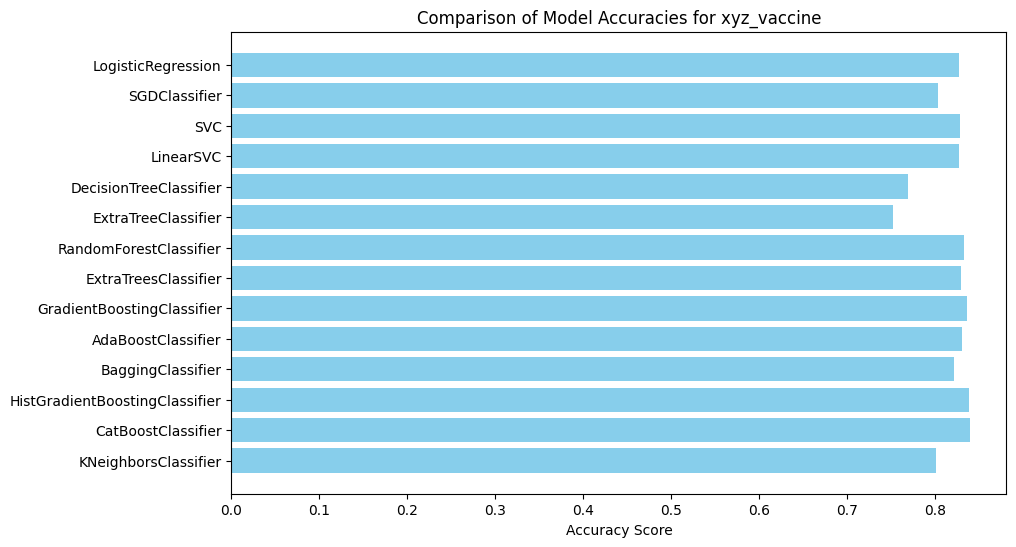

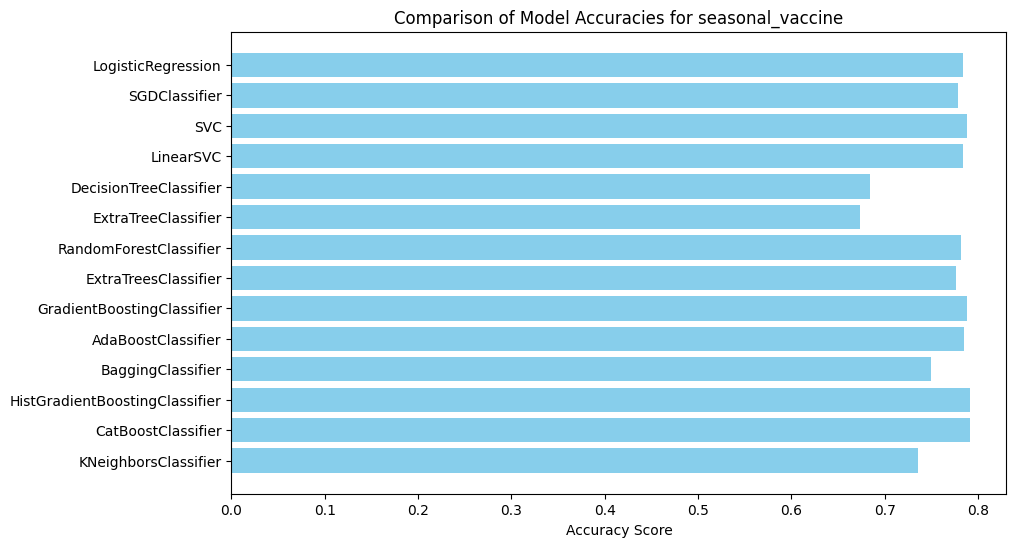

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier, HistGradientBoostingClassifier, VotingClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB, ComplementNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.semi_supervised import LabelSpreading, LabelPropagation

# Define classifiers
model_classifiers = [
    ("LogisticRegression", LogisticRegression(max_iter=1000)),
    ("SGDClassifier", SGDClassifier()),
    ("SVC", SVC()),
    ("LinearSVC", LinearSVC()),

    ("DecisionTreeClassifier", DecisionTreeClassifier()),
    ("ExtraTreeClassifier", ExtraTreeClassifier()),
    ("RandomForestClassifier", RandomForestClassifier()),
    ("ExtraTreesClassifier", ExtraTreesClassifier()),
    ("GradientBoostingClassifier", GradientBoostingClassifier()),
    ("AdaBoostClassifier", AdaBoostClassifier()),
    ("BaggingClassifier", BaggingClassifier()),
    ("HistGradientBoostingClassifier", HistGradientBoostingClassifier()),
    #("XGBClassifier", XGBClassifier()),
    #("LGBMClassifier", LGBMClassifier()),
    ("CatBoostClassifier", CatBoostClassifier(silent=True)),
    ("KNeighborsClassifier", KNeighborsClassifier()),
    #("RadiusNeighborsClassifier", RadiusNeighborsClassifier()),


]

# Preprocess data (assuming X and y are already defined)
# Define feature columns and target columns
feature_columns = [col for col in df.columns if col not in ['xyz_vaccine', 'seasonal_vaccine']]
target_columns = ['xyz_vaccine', 'seasonal_vaccine']

X = df[feature_columns]
y1 = df[target_columns[0]]  # xyz_vaccine
y2 = df[target_columns[1]]  # seasonal_vaccine

# Label encode the target columns
le = LabelEncoder()
y1 = le.fit_transform(y1)
y2 = le.fit_transform(y2)

# Split the data into training and testing sets
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2, random_state=42)
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.2, random_state=42)

# Define evaluation metrics
metrics = {
    "accuracy": accuracy_score,
    "precision": precision_score,
    "recall": recall_score,
    "f1": f1_score
}

# Function to evaluate each model
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model_name, clf = model
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores = {metric: metrics[metric](y_test, y_pred) for metric in metrics}
    return scores

# Evaluate models for xyz_vaccine
results1 = {}
for model in model_classifiers:
    model_name = model[0]
    print(f"Evaluating {model_name} for xyz_vaccine...")
    scores = evaluate_model(model, X_train, y1_train, X_test, y1_test)
    results1[model_name] = scores

# Evaluate models for seasonal_vaccine
results2 = {}
for model in model_classifiers:
    model_name = model[0]
    print(f"Evaluating {model_name} for seasonal_vaccine...")
    scores = evaluate_model(model, X_train, y2_train, X_test, y2_test)
    results2[model_name] = scores

# Print results for xyz_vaccine
print("\nEvaluation results for xyz_vaccine:")
for model_name, scores in results1.items():
    print(f"Model: {model_name}")
    for metric, score in scores.items():
        print(f"{metric}: {score:.4f}")
    print("")

# Print results for seasonal_vaccine
print("\nEvaluation results for seasonal_vaccine:")
for model_name, scores in results2.items():
    print(f"Model: {model_name}")
    for metric, score in scores.items():
        print(f"{metric}: {score:.4f}")
    print("")

# Plotting
def plot_comparison(results, target):
    labels = list(results.keys())
    accuracy_scores = [results[model]['accuracy'] for model in labels]

    plt.figure(figsize=(10, 6))
    plt.barh(labels, accuracy_scores, color='skyblue')
    plt.xlabel('Accuracy Score')
    plt.title(f'Comparison of Model Accuracies for {target}')
    plt.gca().invert_yaxis()
    plt.show()

plot_comparison(results1, 'xyz_vaccine')
plot_comparison(results2, 'seasonal_vaccine')


In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# Define feature columns and target columns
feature_columns = [col for col in df.columns if col not in ['xyz_vaccine', 'seasonal_vaccine']]
target_columns = ['xyz_vaccine', 'seasonal_vaccine']

# Split the data into features and targets
X = df[feature_columns]
y = df[target_columns]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_classifiers =[("LogisticRegression", LogisticRegression(max_iter=1000)),
    ("SGDClassifier", SGDClassifier()),
    ("SVC", SVC()),
    ("LinearSVC", LinearSVC()),

    ("RandomForestClassifier", RandomForestClassifier()),
    ("ExtraTreesClassifier", ExtraTreesClassifier()),
    ("GradientBoostingClassifier", GradientBoostingClassifier()),
    ("AdaBoostClassifier", AdaBoostClassifier()),
    ("BaggingClassifier", BaggingClassifier()),
    ("HistGradientBoostingClassifier", HistGradientBoostingClassifier()),
    #("XGBClassifier", XGBClassifier()),
    #("LGBMClassifier", LGBMClassifier()),
    ("CatBoostClassifier", CatBoostClassifier(silent=True))]

    #("RadiusNeighborsClassifier", RadiusNeighborsClassifier()),
# Function to evaluate model
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model_name, clf = model

    # Fit the model
    clf.fit(X_train, y_train)

    # Predict on test set
    y_pred = clf.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    return accuracy, precision, recall, f1, cm

# Dictionary to store results
results = {}

# Evaluate all models
for model in model_classifiers:
    model_name = model[0]
    print(f"Evaluating {model_name} for xyz_vaccine...")
    scores = evaluate_model(model, X_train, y_train['xyz_vaccine'], X_test, y_test['xyz_vaccine'])
    results[model_name] = scores

    print(f"Evaluating {model_name} for seasonal_vaccine...")
    scores = evaluate_model(model, X_train, y_train['seasonal_vaccine'], X_test, y_test['seasonal_vaccine'])
    results[model_name + '_seasonal'] = scores

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results, index=['Accuracy', 'Precision', 'Recall', 'F1', 'Confusion Matrix'])

# Display results
print(results_df)







Evaluating LogisticRegression for xyz_vaccine...
Evaluating LogisticRegression for seasonal_vaccine...
Evaluating SGDClassifier for xyz_vaccine...
Evaluating SGDClassifier for seasonal_vaccine...
Evaluating SVC for xyz_vaccine...
Evaluating SVC for seasonal_vaccine...
Evaluating LinearSVC for xyz_vaccine...


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Evaluating LinearSVC for seasonal_vaccine...


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Evaluating RandomForestClassifier for xyz_vaccine...
Evaluating RandomForestClassifier for seasonal_vaccine...
Evaluating ExtraTreesClassifier for xyz_vaccine...
Evaluating ExtraTreesClassifier for seasonal_vaccine...
Evaluating GradientBoostingClassifier for xyz_vaccine...
Evaluating GradientBoostingClassifier for seasonal_vaccine...
Evaluating AdaBoostClassifier for xyz_vaccine...
Evaluating AdaBoostClassifier for seasonal_vaccine...
Evaluating BaggingClassifier for xyz_vaccine...
Evaluating BaggingClassifier for seasonal_vaccine...
Evaluating HistGradientBoostingClassifier for xyz_vaccine...
Evaluating HistGradientBoostingClassifier for seasonal_vaccine...
Evaluating CatBoostClassifier for xyz_vaccine...
Evaluating CatBoostClassifier for seasonal_vaccine...
                         LogisticRegression LogisticRegression_seasonal  \
Accuracy                           0.827593                    0.783789   
Precision                          0.756892                    0.783099   
Reca

In [11]:
test_df = pd.read_csv('/content/test_set_features.csv')

In [12]:
test_df

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26703,53410,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,dqpwygqj,"MSA, Principle City",1.0,1.0,NaN,NaN
26704,53411,3.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,Below Poverty,Married,Rent,Employed,qufhixun,Non-MSA,1.0,3.0,fcxhlnwr,vlluhbov
26705,53412,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,qufhixun,"MSA, Not Principle City",1.0,0.0,NaN,NaN
26706,53413,3.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,bhuqouqj,"MSA, Not Principle City",1.0,0.0,NaN,NaN


In [40]:
n1=test_df.isnull().sum()
print(n1)

respondent_id                      0
xyz_concern                       85
xyz_knowledge                    122
behavioral_antiviral_meds         79
behavioral_avoidance             213
behavioral_face_mask              19
behavioral_wash_hands             40
behavioral_large_gatherings       72
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_xyz                 2160
doctor_recc_seasonal            2160
chronic_med_condition            932
child_under_6_months             813
health_worker                    789
health_insurance               12228
opinion_xyz_vacc_effective       398
opinion_xyz_risk                 380
opinion_xyz_sick_from_vacc       375
opinion_seas_vacc_effective      452
opinion_seas_risk                499
opinion_seas_sick_from_vacc      521
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4497
m

Applying LogisticRegression for xyz_vaccine...
Applying LogisticRegression for seasonal_vaccine...
Applying SGDClassifier for xyz_vaccine...
Applying SGDClassifier for seasonal_vaccine...
Applying SVC for xyz_vaccine...
Applying SVC for seasonal_vaccine...
Applying LinearSVC for xyz_vaccine...


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Applying LinearSVC for seasonal_vaccine...


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Applying RandomForestClassifier for xyz_vaccine...
Applying RandomForestClassifier for seasonal_vaccine...
Applying ExtraTreesClassifier for xyz_vaccine...
Applying ExtraTreesClassifier for seasonal_vaccine...
Applying GradientBoostingClassifier for xyz_vaccine...
Applying GradientBoostingClassifier for seasonal_vaccine...
Applying AdaBoostClassifier for xyz_vaccine...
Applying AdaBoostClassifier for seasonal_vaccine...
Applying BaggingClassifier for xyz_vaccine...
Applying BaggingClassifier for seasonal_vaccine...
Applying HistGradientBoostingClassifier for xyz_vaccine...
Applying HistGradientBoostingClassifier for seasonal_vaccine...
Applying CatBoostClassifier for xyz_vaccine...
Applying CatBoostClassifier for seasonal_vaccine...

Evaluation results for xyz_vaccine:
Model: LogisticRegression
accuracy: 0.7201
precision: 0.2023
recall: 0.1097
f1: 0.1423

Evaluation results for seasonal_vaccine:
Model: LogisticRegression_seasonal
accuracy: 0.5064
precision: 0.4599
recall: 0.4357
f1: 0.

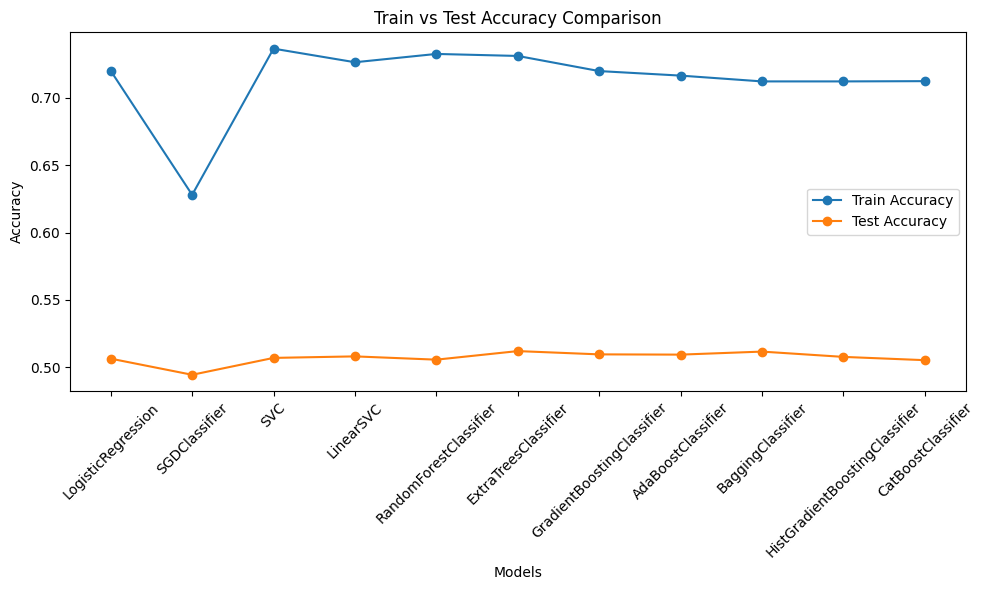

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier,
    AdaBoostClassifier, BaggingClassifier, HistGradientBoostingClassifier
)
#from xgboost import XGBClassifier
#from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB, ComplementNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis

# Load your test dataset
#test_df = pd.read_csv('path_to_your_test_dataset.csv')

# Define feature columns and target columns
feature_columns = [col for col in testdf.columns if col not in ['xyz_vaccine', 'seasonal_vaccine']]

# Ensure the same column order as in the training set
X_test = testdf[feature_columns]

# Load trained models
model_classifiers = [
    ("LogisticRegression", LogisticRegression(max_iter=1000)),
    ("SGDClassifier", SGDClassifier()),
    ("SVC", SVC()),
    ("LinearSVC", LinearSVC()),
    ("RandomForestClassifier", RandomForestClassifier()),
    ("ExtraTreesClassifier", ExtraTreesClassifier()),
    ("GradientBoostingClassifier", GradientBoostingClassifier()),
    ("AdaBoostClassifier", AdaBoostClassifier()),
    ("BaggingClassifier", BaggingClassifier()),
    ("HistGradientBoostingClassifier", HistGradientBoostingClassifier()),
    ("CatBoostClassifier", CatBoostClassifier(silent=True))
]

# Function to evaluate model
def evaluate_model(model, X_train, y_train, X_test):
    model_name, clf = model

    # Fit the model
    clf.fit(X_train, y_train)

    # Predict on test set
    y_pred = clf.predict(X_test)

    return y_pred

# Dictionary to store predictions
test_predictions = {}

# Evaluate all models on the test set
for model in model_classifiers:
    model_name = model[0]
    print(f"Applying {model_name} for xyz_vaccine...")
    y_pred_xyz = evaluate_model(model, X_train, y_train['xyz_vaccine'], X_test)
    test_predictions[model_name] = y_pred_xyz

    print(f"Applying {model_name} for seasonal_vaccine...")
    y_pred_seasonal = evaluate_model(model, X_train, y_train['seasonal_vaccine'], X_test)
    test_predictions[model_name + '_seasonal'] = y_pred_seasonal

# Save predictions to a file or use them as needed
# Example:
# pd.DataFrame(test_predictions).to_csv('predictions.csv', index=False)

# Evaluate performance metrics: accuracy, precision, recall, F1-score
results = {}
for model_name, y_pred in test_predictions.items():
    if '_seasonal' in model_name:
        target = 'seasonal_vaccine'
        y_test_target = y_test['seasonal_vaccine']
    else:
        target = 'xyz_vaccine'
        y_test_target = y_test['xyz_vaccine']

    # Ensure y_pred and y_test_target have the same number of samples
    y_pred = y_pred[:len(y_test_target)]

    accuracy = accuracy_score(y_test_target, y_pred)
    precision = precision_score(y_test_target, y_pred)
    recall = recall_score(y_test_target, y_pred)
    f1 = f1_score(y_test_target, y_pred)

    results[model_name] = {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1}

    print(f"\nEvaluation results for {target}:")
    print(f"Model: {model_name}")
    print(f"accuracy: {accuracy:.4f}")
    print(f"precision: {precision:.4f}")
    print(f"recall: {recall:.4f}")
    print(f"f1: {f1:.4f}")

# Plotting test vs train accuracy
train_accuracies = []
test_accuracies = []

for model in model_classifiers:
    model_name = model[0]
    train_accuracy = results[model_name]['accuracy']
    test_accuracy = results[model_name + '_seasonal']['accuracy']
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

plt.figure(figsize=(10, 6))
plt.plot(range(len(model_classifiers)), train_accuracies, marker='o', label='Train Accuracy')
plt.plot(range(len(model_classifiers)), test_accuracies, marker='o', label='Test Accuracy')
plt.xticks(range(len(model_classifiers)), [model[0] for model in model_classifiers], rotation=45)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Train vs Test Accuracy Comparison')
plt.legend()
plt.tight_layout()
plt.show()

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters found for xyz_vaccine:
{'clf__C': 0.001, 'clf__solver': 'liblinear'}
Best cross-validation score for xyz_vaccine: 0.8286449801076528

Evaluation results for xyz_vaccine:
Training Accuracy: 0.8303, Precision: 0.6766, Recall: 0.3853, F1-score: 0.4910
Test Accuracy: 0.8313, Precision: 0.6875, Recall: 0.3780, F1-score: 0.4878


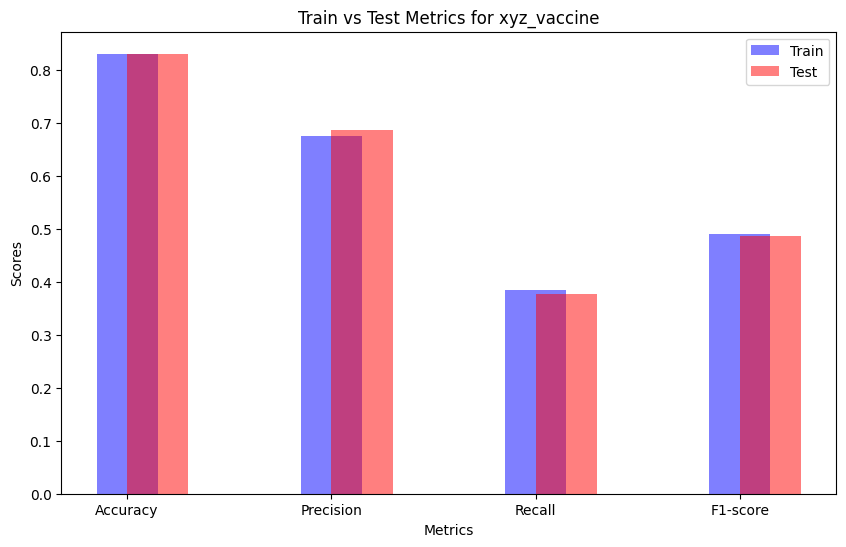

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler



# Define feature columns and target columns
feature_columns = [col for col in df.columns if col not in ['xyz_vaccine', 'seasonal_vaccine']]
target_columns = ['xyz_vaccine', 'seasonal_vaccine']

X = df[feature_columns]
y = df[target_columns]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define the Logistic Regression model
logistic_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(max_iter=1000, random_state=42))
])

# Define the hyperparameters to tune
param_grid = {
    'clf__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'clf__solver': ['liblinear', 'lbfgs', 'saga'],  # Solver algorithm
}

# Perform GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(logistic_pipeline, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train['xyz_vaccine'])

# Print the best parameters and best score
print("Best parameters found for xyz_vaccine:")
print(grid_search.best_params_)
print("Best cross-validation score for xyz_vaccine:", grid_search.best_score_)

# Evaluate the model on the test set
y_pred_train = grid_search.predict(X_train)
y_pred_test = grid_search.predict(X_test)

# Calculate performance metrics for training and test sets
train_accuracy = accuracy_score(y_train['xyz_vaccine'], y_pred_train)
train_precision = precision_score(y_train['xyz_vaccine'], y_pred_train)
train_recall = recall_score(y_train['xyz_vaccine'], y_pred_train)
train_f1 = f1_score(y_train['xyz_vaccine'], y_pred_train)

test_accuracy = accuracy_score(y_test['xyz_vaccine'], y_pred_test)
test_precision = precision_score(y_test['xyz_vaccine'], y_pred_test)
test_recall = recall_score(y_test['xyz_vaccine'], y_pred_test)
test_f1 = f1_score(y_test['xyz_vaccine'], y_pred_test)

# Print evaluation results
print("\nEvaluation results for xyz_vaccine:")
print(f"Training Accuracy: {train_accuracy:.4f}, Precision: {train_precision:.4f}, Recall: {train_recall:.4f}, F1-score: {train_f1:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}, Precision: {test_precision:.4f}, Recall: {test_recall:.4f}, F1-score: {test_f1:.4f}")

# Plotting train vs test metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
train_metrics = [train_accuracy, train_precision, train_recall, train_f1]
test_metrics = [test_accuracy, test_precision, test_recall, test_f1]

plt.figure(figsize=(10, 6))
plt.bar(metrics, train_metrics, alpha=0.5, color='b', width=0.3, align='center', label='Train')
plt.bar(metrics, test_metrics, alpha=0.5, color='r', width=0.3, align='edge', label='Test')
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Train vs Test Metrics for xyz_vaccine')
plt.legend()
plt.show()


In [51]:
testdf

,age_group_35 - 44 Years,age_group_45 - 54 Years,age_group_55 - 64 Years,age_group_65+ Years,education_< 12 Years,education_College Graduate,education_Some College,education_Unknown,race_Hispanic,race_Other or Multiple,...,opinion_xyz_vacc_effective,opinion_xyz_risk,opinion_xyz_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_size,behavioral_score,doctor_recc_total,concern_knowledge_interaction
respondent_id,,,,,,,,,,,,,,,,,,,,,
26707.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,5.0,1.0,1.0,5.0,1.0,1.0,1.0,4.0,0.0,4.0
26708.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,1.0,1.0,4.0,1.0,1.0,2.5,1.0,0.0,2.0
26709.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,5.0,4.0,2.0,5.0,4.0,4.0,1.0,4.0,0.0,4.0
26710.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,2.0,2.0,4.0,4.0,2.0,1.0,1.0,1.0,2.0
26711.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,2.0,4.0,4.0,4.0,2.0,1.0,5.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53410.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,4.0,2.0,2.0,4.0,2.0,1.0,2.0,3.0,1.0,2.0
53411.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,1.0,1.0,5.0,2.0,2.0,3.5,5.0,0.0,4.0
53412.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,4.0,3.0,1.0,4.0,3.0,1.0,1.0,1.0,0.0,1.0


In [81]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Load your dataset
# df = pd.read_csv('path_to_your_dataset.csv')  # Uncomment and specify the path to your dataset

# Define feature columns and target columns
feature_columns = [col for col in df.columns if col not in ['xyz_vaccine', 'seasonal_vaccine']]
target_columns = ['xyz_vaccine', 'seasonal_vaccine']

X = df[feature_columns]
y = df[target_columns]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Function to perform hyperparameter tuning and cross-validation for a given target
def tune_and_evaluate_model(X_train, y_train, X_test, y_test, target_name):
    # Define the Logistic Regression pipeline
    logistic_pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('clf', LogisticRegression(max_iter=1000, random_state=42))
    ])

    # Define the hyperparameters to tune
    param_grid = {
        'clf__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
        'clf__solver': ['liblinear', 'lbfgs', 'saga'],  # Solver algorithm
    }

    # Perform GridSearchCV with 5-fold cross-validation
    grid_search = GridSearchCV(logistic_pipeline, param_grid, cv=5, scoring='accuracy', verbose=1)
    grid_search.fit(X_train, y_train)

    # Print the best parameters and best score
    print(f"Best parameters found for {target_name}:")
    print(grid_search.best_params_)
    print(f"Best cross-validation score for {target_name}: {grid_search.best_score_}")

    # Evaluate the model on the test set
    y_pred_train = grid_search.predict(X_train)
    y_pred_test = grid_search.predict(X_test)

    # Calculate performance metrics for training and test sets
    train_accuracy = accuracy_score(y_train, y_pred_train)
    train_precision = precision_score(y_train, y_pred_train)
    train_recall = recall_score(y_train, y_pred_train)
    train_f1 = f1_score(y_train, y_pred_train)

    test_accuracy = accuracy_score(y_test, y_pred_test)
    test_precision = precision_score(y_test, y_pred_test)
    test_recall = recall_score(y_test, y_pred_test)
    test_f1 = f1_score(y_test, y_pred_test)

    # Print evaluation results
    print(f"\nEvaluation results for {target_name}:")
    print(f"Training Accuracy: {train_accuracy:.4f}, Precision: {train_precision:.4f}, Recall: {train_recall:.4f}, F1-score: {train_f1:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}, Precision: {test_precision:.4f}, Recall: {test_recall:.4f}, F1-score: {test_f1:.4f}")

    # Return the best model
    return grid_search.best_estimator_

# Tune and evaluate models for both target columns
best_model_xyz = tune_and_evaluate_model(X_train, y_train['xyz_vaccine'], X_test, y_test['xyz_vaccine'], 'xyz_vaccine')
best_model_seasonal = tune_and_evaluate_model(X_train, y_train['seasonal_vaccine'], X_test, y_test['seasonal_vaccine'], 'seasonal_vaccine')




Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters found for xyz_vaccine:
{'clf__C': 0.001, 'clf__solver': 'liblinear'}
Best cross-validation score for xyz_vaccine: 0.8286449801076528

Evaluation results for xyz_vaccine:
Training Accuracy: 0.8303, Precision: 0.6766, Recall: 0.3853, F1-score: 0.4910
Test Accuracy: 0.8313, Precision: 0.6875, Recall: 0.3780, F1-score: 0.4878
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters found for seasonal_vaccine:
{'clf__C': 0.01, 'clf__solver': 'liblinear'}
Best cross-validation score for seasonal_vaccine: 0.7800140416569155

Evaluation results for seasonal_vaccine:
Training Accuracy: 0.7825, Precision: 0.7802, Recall: 0.7418, F1-score: 0.7605
Test Accuracy: 0.7815, Precision: 0.7788, Recall: 0.7416, F1-score: 0.7597


In [82]:
testdf.columns

Index(['age_group_35 - 44 Years', 'age_group_45 - 54 Years',
       'age_group_55 - 64 Years', 'age_group_65+ Years',
       'education_< 12 Years', 'education_College Graduate',
       'education_Some College', 'education_Unknown', 'race_Hispanic',
       'race_Other or Multiple', 'race_White', 'sex_Male',
       'income_poverty_> $75,000', 'income_poverty_Below Poverty',
       'income_poverty_Unknown', 'marital_status_Not Married',
       'marital_status_Unknown', 'rent_or_own_Rent', 'rent_or_own_Unknown',
       'employment_status_Not in Labor Force', 'employment_status_Unemployed',
       'employment_status_Unknown', 'hhs_geo_region_bhuqouqj',
       'hhs_geo_region_dqpwygqj', 'hhs_geo_region_fpwskwrf',
       'hhs_geo_region_kbazzjca', 'hhs_geo_region_lrircsnp',
       'hhs_geo_region_lzgpxyit', 'hhs_geo_region_mlyzmhmf',
       'hhs_geo_region_oxchjgsf', 'hhs_geo_region_qufhixun',
       'census_msa_MSA, Principle City', 'census_msa_Non-MSA',
       'employment_industry_arjwrbjb

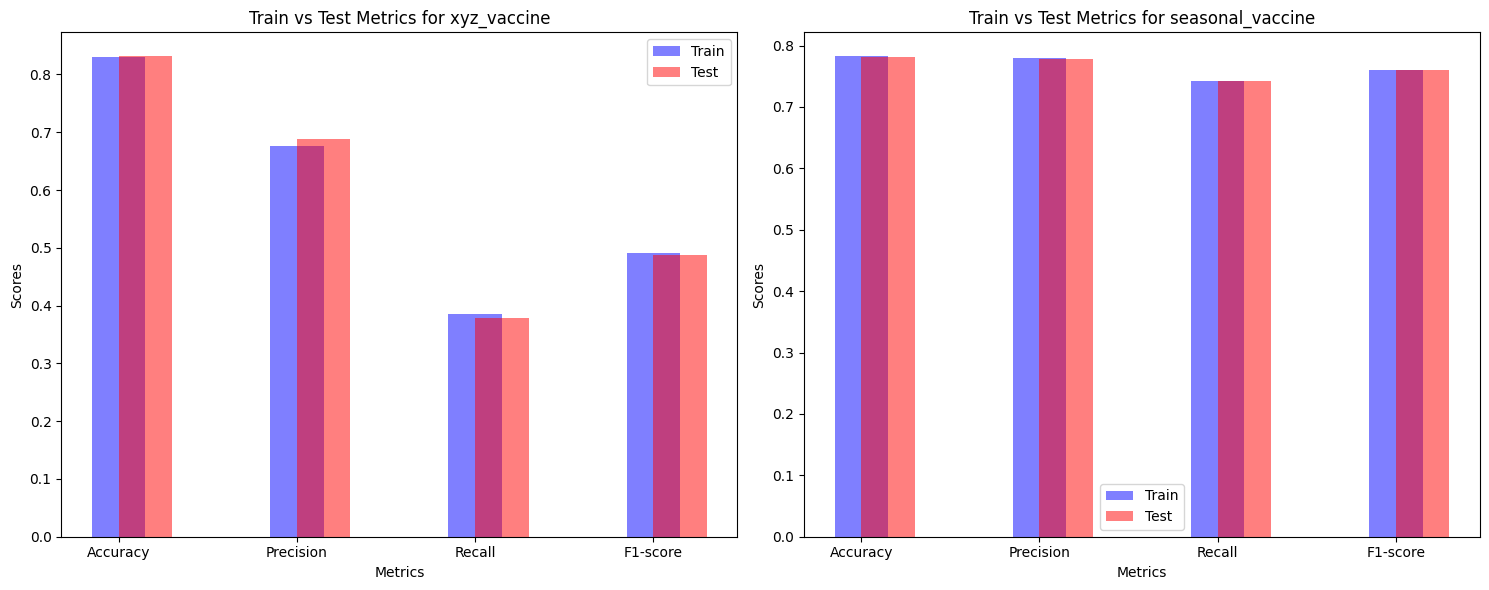

In [83]:
# Load your new test dataset which does not contain target columns
# testdf = pd.read_csv('path_to_your_test_dataset.csv')  # Uncomment and specify the path to your test dataset

# Ensure the same column order as in the training set
X_new_test = testdf[feature_columns]

# Predict the target values for the new test dataset
y_pred_xyz = best_model_xyz.predict(X_new_test)
y_pred_seasonal = best_model_seasonal.predict(X_new_test)

# Create a DataFrame with the predictions
predictions = pd.DataFrame({
    'respondent_id': testdf['respondent_id'],
    'xyz_vaccine': y_pred_xyz,
    'seasonal_vaccine': y_pred_seasonal
})

# Save the predictions to a CSV file
predictions.to_csv('predictions.csv', index=False)

# Plotting train vs test metrics for both targets
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# xyz_vaccine metrics
y_pred_train_xyz = best_model_xyz.predict(X_train)
y_pred_test_xyz = best_model_xyz.predict(X_test)

train_accuracy_xyz = accuracy_score(y_train['xyz_vaccine'], y_pred_train_xyz)
train_precision_xyz = precision_score(y_train['xyz_vaccine'], y_pred_train_xyz)
train_recall_xyz = recall_score(y_train['xyz_vaccine'], y_pred_train_xyz)
train_f1_xyz = f1_score(y_train['xyz_vaccine'], y_pred_train_xyz)

test_accuracy_xyz = accuracy_score(y_test['xyz_vaccine'], y_pred_test_xyz)
test_precision_xyz = precision_score(y_test['xyz_vaccine'], y_pred_test_xyz)
test_recall_xyz = recall_score(y_test['xyz_vaccine'], y_pred_test_xyz)
test_f1_xyz = f1_score(y_test['xyz_vaccine'], y_pred_test_xyz)

train_metrics_xyz = [train_accuracy_xyz, train_precision_xyz, train_recall_xyz, train_f1_xyz]
test_metrics_xyz = [test_accuracy_xyz, test_precision_xyz, test_recall_xyz, test_f1_xyz]

axes[0].bar(metrics, train_metrics_xyz, alpha=0.5, color='b', width=0.3, align='center', label='Train')
axes[0].bar(metrics, test_metrics_xyz, alpha=0.5, color='r', width=0.3, align='edge', label='Test')
axes[0].set_xlabel('Metrics')
axes[0].set_ylabel('Scores')
axes[0].set_title('Train vs Test Metrics for xyz_vaccine')
axes[0].legend()

# seasonal_vaccine metrics
y_pred_train_seasonal = best_model_seasonal.predict(X_train)
y_pred_test_seasonal = best_model_seasonal.predict(X_test)

train_accuracy_seasonal = accuracy_score(y_train['seasonal_vaccine'], y_pred_train_seasonal)
train_precision_seasonal = precision_score(y_train['seasonal_vaccine'], y_pred_train_seasonal)
train_recall_seasonal = recall_score(y_train['seasonal_vaccine'], y_pred_train_seasonal)
train_f1_seasonal = f1_score(y_train['seasonal_vaccine'], y_pred_train_seasonal)

test_accuracy_seasonal = accuracy_score(y_test['seasonal_vaccine'], y_pred_test_seasonal)
test_precision_seasonal = precision_score(y_test['seasonal_vaccine'], y_pred_test_seasonal)
test_recall_seasonal = recall_score(y_test['seasonal_vaccine'], y_pred_test_seasonal)
test_f1_seasonal = f1_score(y_test['seasonal_vaccine'], y_pred_test_seasonal)

train_metrics_seasonal = [train_accuracy_seasonal, train_precision_seasonal, train_recall_seasonal, train_f1_seasonal]
test_metrics_seasonal = [test_accuracy_seasonal, test_precision_seasonal, test_recall_seasonal, test_f1_seasonal]

axes[1].bar(metrics, train_metrics_seasonal, alpha=0.5, color='b', width=0.3, align='center', label='Train')
axes[1].bar(metrics, test_metrics_seasonal, alpha=0.5, color='r', width=0.3, align='edge', label='Test')
axes[1].set_xlabel('Metrics')
axes[1].set_ylabel('Scores')
axes[1].set_title('Train vs Test Metrics for seasonal_vaccine')
axes[1].legend()

plt.tight_layout()
plt.show()

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostClassifier

# Load your dataset
# df = pd.read_csv('path_to_your_dataset.csv')  # Uncomment and specify the path to your dataset

# Define feature columns and target columns
feature_columns = [col for col in df.columns if col not in ['xyz_vaccine', 'seasonal_vaccine']]
target_columns = ['xyz_vaccine', 'seasonal_vaccine']

X = df[feature_columns]
y = df[target_columns]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Function to perform hyperparameter tuning and cross-validation for a given target using CatBoostClassifier
def tune_and_evaluate_model_catboost(X_train, y_train, X_test, y_test, target_name):
    # Define the CatBoostClassifier pipeline
    catboost_pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('clf', CatBoostClassifier(random_state=42, silent=True))
    ])

    # Define the hyperparameters to tune
    param_grid = {
        'clf__iterations': [100, 200, 300],
        'clf__depth': [4, 6, 8],
        'clf__learning_rate': [0.01, 0.05, 0.1]
    }

    # Perform GridSearchCV with 5-fold cross-validation
    grid_search = GridSearchCV(catboost_pipeline, param_grid, cv=5, scoring='accuracy', verbose=1)
    grid_search.fit(X_train, y_train)

    # Print the best parameters and best score
    print(f"Best parameters found for {target_name}:")
    print(grid_search.best_params_)
    print(f"Best cross-validation score for {target_name}: {grid_search.best_score_}")

    # Evaluate the model on the test set
    y_pred_train = grid_search.predict(X_train)
    y_pred_test = grid_search.predict(X_test)

    # Calculate performance metrics for training and test sets
    train_accuracy = accuracy_score(y_train, y_pred_train)
    train_precision = precision_score(y_train, y_pred_train)
    train_recall = recall_score(y_train, y_pred_train)
    train_f1 = f1_score(y_train, y_pred_train)

    test_accuracy = accuracy_score(y_test, y_pred_test)
    test_precision = precision_score(y_test, y_pred_test)
    test_recall = recall_score(y_test, y_pred_test)
    test_f1 = f1_score(y_test, y_pred_test)

    # Print evaluation results
    print(f"\nEvaluation results for {target_name}:")
    print(f"Training Accuracy: {train_accuracy:.4f}, Precision: {train_precision:.4f}, Recall: {train_recall:.4f}, F1-score: {train_f1:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}, Precision: {test_precision:.4f}, Recall: {test_recall:.4f}, F1-score: {test_f1:.4f}")

    # Return the best model
    return grid_search.best_estimator_

# Tune and evaluate models for both target columns using CatBoostClassifier
best_model_xyz_catboost = tune_and_evaluate_model_catboost(X_train, y_train['xyz_vaccine'], X_test, y_test['xyz_vaccine'], 'xyz_vaccine')
best_model_seasonal_catboost = tune_and_evaluate_model_catboost(X_train, y_train['seasonal_vaccine'], X_test, y_test['seasonal_vaccine'], 'seasonal_vaccine')

# Load your new test dataset which does not contain target columns
# testdf = pd.read_csv('path_to_your_test_dataset.csv')  # Uncomment and specify the path to your test dataset



Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters found for xyz_vaccine:
{'clf__depth': 8, 'clf__iterations': 200, 'clf__learning_rate': 0.05}
Best cross-validation score for xyz_vaccine: 0.8427334425462204

Evaluation results for xyz_vaccine:
Training Accuracy: 0.8691, Precision: 0.8138, Recall: 0.4979, F1-score: 0.6178
Test Accuracy: 0.8463, Precision: 0.7343, Recall: 0.4335, F1-score: 0.5452
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters found for seasonal_vaccine:
{'clf__depth': 6, 'clf__iterations': 200, 'clf__learning_rate': 0.1}
Best cross-validation score for seasonal_vaccine: 0.7842733442546221

Evaluation results for seasonal_vaccine:
Training Accuracy: 0.8164, Precision: 0.8136, Recall: 0.7858, F1-score: 0.7994
Test Accuracy: 0.7814, Precision: 0.7757, Recall: 0.7464, F1-score: 0.7608


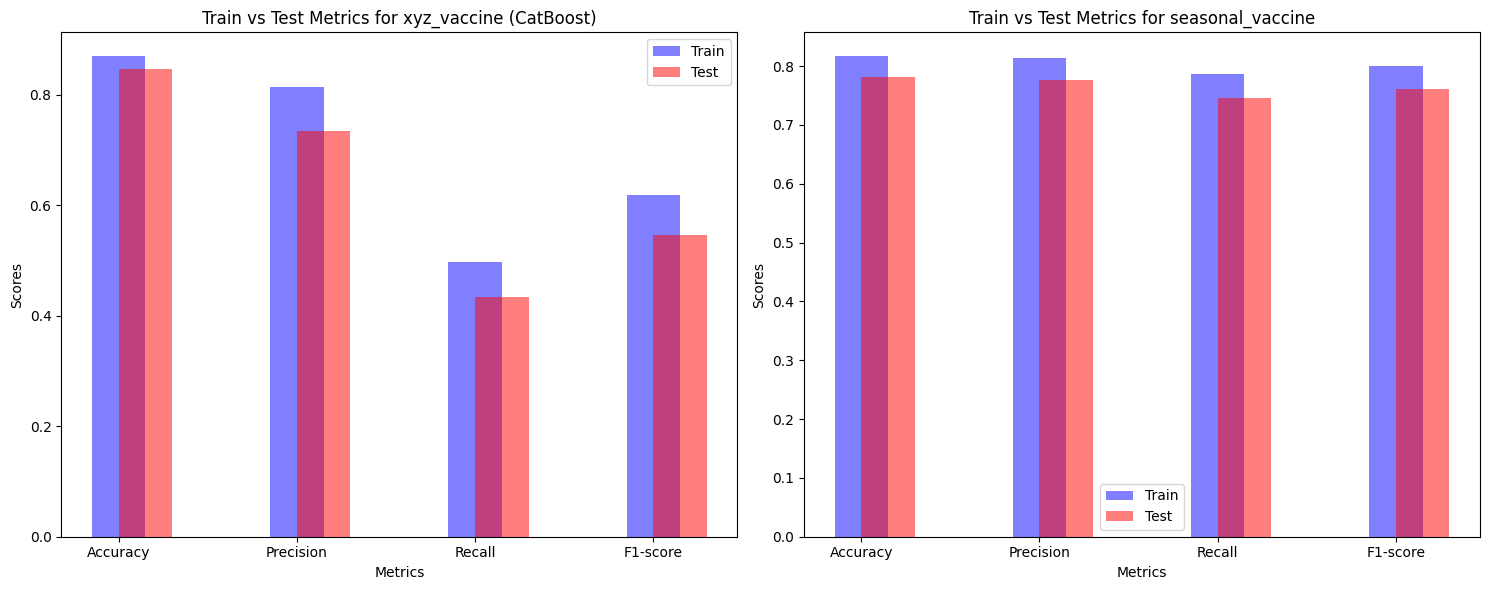

In [43]:
# Ensure the same column order as in the training set
X_new_test = testdf[feature_columns]

# Predict the target values for the new test dataset
y_pred_xyz_catboost = best_model_xyz_catboost.predict(X_new_test)
y_pred_seasonal_catboost = best_model_seasonal_catboost.predict(X_new_test)

# Check if 'respondent_id' exists in testdf
if 'respondent_id' not in testdf.columns:
    print("Error: 'respondent_id' column not found in testdf.")
else:
    # Create a DataFrame with the predictions
    predictions = pd.DataFrame({
        'respondent_id': testdf['respondent_id'],
        'xyz_vaccine': y_pred_xyz_catboost,
        'seasonal_vaccine': y_pred_seasonal_catboost
    })

    # Save the predictions to a CSV file
    predictions.to_csv('predictions_catboost.csv', index=False)

# Plotting train vs test metrics for both targets
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# xyz_vaccine metrics
y_pred_train_xyz_catboost = best_model_xyz_catboost.predict(X_train)
y_pred_test_xyz_catboost = best_model_xyz_catboost.predict(X_test)

train_accuracy_xyz_catboost = accuracy_score(y_train['xyz_vaccine'], y_pred_train_xyz_catboost)
train_precision_xyz_catboost = precision_score(y_train['xyz_vaccine'], y_pred_train_xyz_catboost)
train_recall_xyz_catboost = recall_score(y_train['xyz_vaccine'], y_pred_train_xyz_catboost)
train_f1_xyz_catboost = f1_score(y_train['xyz_vaccine'], y_pred_train_xyz_catboost)

test_accuracy_xyz_catboost = accuracy_score(y_test['xyz_vaccine'], y_pred_test_xyz_catboost)
test_precision_xyz_catboost = precision_score(y_test['xyz_vaccine'], y_pred_test_xyz_catboost)
test_recall_xyz_catboost = recall_score(y_test['xyz_vaccine'], y_pred_test_xyz_catboost)
test_f1_xyz_catboost = f1_score(y_test['xyz_vaccine'], y_pred_test_xyz_catboost)

train_metrics_xyz_catboost = [train_accuracy_xyz_catboost, train_precision_xyz_catboost, train_recall_xyz_catboost, train_f1_xyz_catboost]
test_metrics_xyz_catboost = [test_accuracy_xyz_catboost, test_precision_xyz_catboost, test_recall_xyz_catboost, test_f1_xyz_catboost]

axes[0].bar(metrics, train_metrics_xyz_catboost, alpha=0.5, color='b', width=0.3, align='center', label='Train')
axes[0].bar(metrics, test_metrics_xyz_catboost, alpha=0.5, color='r', width=0.3, align='edge', label='Test')
axes[0].set_xlabel('Metrics')
axes[0].set_ylabel('Scores')
axes[0].set_title('Train vs Test Metrics for xyz_vaccine (CatBoost)')
axes[0].legend()

# seasonal_vaccine metrics
y_pred_train_seasonal_catboost = best_model_seasonal_catboost.predict(X_train)
y_pred_test_seasonal_catboost = best_model_seasonal_catboost.predict(X_test)

train_accuracy_seasonal_catboost = accuracy_score(y_train['seasonal_vaccine'], y_pred_train_seasonal_catboost)
train_precision_seasonal_catboost = precision_score(y_train['seasonal_vaccine'], y_pred_train_seasonal_catboost)
train_recall_seasonal_catboost = recall_score(y_train['seasonal_vaccine'], y_pred_train_seasonal_catboost)
train_f1_seasonal_catboost = f1_score(y_train['seasonal_vaccine'], y_pred_train_seasonal_catboost)

test_accuracy_seasonal_catboost = accuracy_score(y_test['seasonal_vaccine'], y_pred_test_seasonal_catboost)
test_precision_seasonal_catboost = precision_score(y_test['seasonal_vaccine'], y_pred_test_seasonal_catboost)
test_recall_seasonal_catboost = recall_score(y_test['seasonal_vaccine'], y_pred_test_seasonal_catboost)
test_f1_seasonal_catboost = f1_score(y_test['seasonal_vaccine'], y_pred_test_seasonal_catboost)

train_metrics_seasonal_catboost = [train_accuracy_seasonal_catboost, train_precision_seasonal_catboost, train_recall_seasonal_catboost, train_f1_seasonal_catboost]
test_metrics_seasonal_catboost = [test_accuracy_seasonal_catboost,test_precision_seasonal_catboost,test_recall_seasonal_catboost,test_f1_seasonal_catboost]



axes[1].bar(metrics, train_metrics_seasonal_catboost, alpha=0.5, color='b', width=0.3, align='center', label='Train')
axes[1].bar(metrics, test_metrics_seasonal_catboost, alpha=0.5, color='r', width=0.3, align='edge', label='Test')
axes[1].set_xlabel('Metrics')
axes[1].set_ylabel('Scores')
axes[1].set_title('Train vs Test Metrics for seasonal_vaccine')
axes[1].legend()

plt.tight_layout()
plt.show()